In [1]:
import pandas as pd
import numpy as np
import json
import requests 
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes 
import folium
!conda install -c conda-forge geopy --yes
!pip install geocoder
from geopy.geocoders import Nominatim 
import geocoder

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    ------------------------------------------------------------
                       

In [17]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

client_8f23c350001e42119f21fa59ee72217a = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='j4n0uNTY_uXEmXeqY5mwnehMcK4Wl3WFF-z-g1RA-EZO',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_8f23c350001e42119f21fa59ee72217a.get_object(Bucket='applieddatasciencecapstonefinalpr-donotdelete-pr-ffb3rgqpylabue',Key='CrimeReports.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_0 = pd.read_csv(body, error_bad_lines = False, warn_bad_lines = False, header = None)
df_0.head()

,0,1,2,3,4,5,6,7,8
0,1,FRAUD-26C-1,FRAUD - IMPERSONATION,4/22/2020,1101.0,7100 LAYTON DR,SPRINGFIELD,VA,22150.0
1,1,FRAUD-26C-1,FRAUD - IMPERSONATION,4/22/2020,1709.0,900 WALKER RD,GREAT FALLS,VA,22066.0
2,1,FRAUD-26C-1,FRAUD - IMPERSONATION,4/22/2020,1925.0,8300 SOUTHSTREAM RUN,SPRINGFIELD,VA,22153.0
3,1,FRAUD-26A-1,FRAUD - FALSE PRETENSES/SWINDLE/CONFIDENCE GAME,4/22/2020,921.0,6600 MADISON MCLEAN DR,MCLEAN,VA,22101.0
4,1,FRAUD-26C-1,FRAUD - IMPERSONATION,4/22/2020,NaN,6000 WOODMONT RD,ALEXANDRIA,VA,22307.0


In [19]:
#df_original = pd.read_csv('https://www.fairfaxcounty.gov/apps/pfsu/api/file/crimereportsfromsp', error_bad_lines=False, warn_bad_lines=False, header=None)
df_original = df_0.dropna().reset_index(drop=True)
df_original = df_original[[1, 2, 3, 6, 7, 8]]
df_original.columns = ['Crime', 'Description', 'Date', 'Neighborhood', 'State', 'Zip_code']
df_original.head()

,Crime,Description,Date,Neighborhood,State,Zip_code
0,FRAUD-26C-1,FRAUD - IMPERSONATION,4/22/2020,SPRINGFIELD,VA,22150.0
1,FRAUD-26C-1,FRAUD - IMPERSONATION,4/22/2020,GREAT FALLS,VA,22066.0
2,FRAUD-26C-1,FRAUD - IMPERSONATION,4/22/2020,SPRINGFIELD,VA,22153.0
3,FRAUD-26A-1,FRAUD - FALSE PRETENSES/SWINDLE/CONFIDENCE GAME,4/22/2020,MCLEAN,VA,22101.0
4,FRAUD-26A-1,FRAUD - FALSE PRETENSES/SWINDLE/CONFIDENCE GAME,4/22/2020,FAIRFAX,VA,22031.0


In [20]:
# The code was removed by Watson Studio for sharing.

(788, 3)


,Neighborhood,Population,Zip_code
0,Virginia Beach,62321,23464
1,Woodbridge,60216,22193
2,Chesapeake,51229,23322
3,Virginia Beach,50900,23454
4,Virginia Beach,49874,23452


In [21]:
df = df_original[df_original['State'].str.contains("VA")].reset_index(drop=True)
df['Date'] = pd.to_datetime(df['Date'])  
df = df[df['Zip_code'].isin(Population['Zip_code'].to_list()) & (df['Date'] >= '2020-04-23') & (df['Date'] <= '2020-04-30')].reset_index(drop=True)
df['Zip_code'] = df['Zip_code'].astype(int)
df['Zip_code'] = df['Zip_code'].astype(str)
print(df.shape)
df.head()

(1367, 6)


,Crime,Description,Date,Neighborhood,State,Zip_code
0,FRAUD-26C-1,FRAUD - IMPERSONATION,2020-04-23,FAIRFAX,VA,22030
1,LARC-23-11,LARCENY - CHECKS; CREDIT CARDS; BANK NOTES; ETC.,2020-04-23,ALEXANDRIA,VA,22315
2,FRAUD-26C-1,FRAUD - IMPERSONATION,2020-04-23,ALEXANDRIA,VA,22315
3,SERV-29,SERVICE - DOMESTIC DISPUTE,2020-04-23,ANNANDALE,VA,22003
4,SERV-29,SERVICE - DOMESTIC DISPUTE,2020-04-23,CENTREVILLE,VA,20120


In [22]:
print(df.min()[2])
print(df.max()[2])

2020-04-23 00:00:00
2020-04-30 00:00:00


In [23]:
Crime_Category = []
for i in range(len(df['Crime'])):
    tmp = df['Crime'][i]
    Crime_Category.append(tmp.split("-")[0])
    
df["Crime_Category"] = Crime_Category
df.head()

,Crime,Description,Date,Neighborhood,State,Zip_code,Crime_Category
0,FRAUD-26C-1,FRAUD - IMPERSONATION,2020-04-23,FAIRFAX,VA,22030,FRAUD
1,LARC-23-11,LARCENY - CHECKS; CREDIT CARDS; BANK NOTES; ETC.,2020-04-23,ALEXANDRIA,VA,22315,LARC
2,FRAUD-26C-1,FRAUD - IMPERSONATION,2020-04-23,ALEXANDRIA,VA,22315,FRAUD
3,SERV-29,SERVICE - DOMESTIC DISPUTE,2020-04-23,ANNANDALE,VA,22003,SERV
4,SERV-29,SERVICE - DOMESTIC DISPUTE,2020-04-23,CENTREVILLE,VA,20120,SERV


In [25]:
Freq = df.groupby(['Crime_Category']).size().to_frame(name='Count')
Freq = Freq.sort_values(by=['Count'], ascending=False)
print(Freq.shape)
Freq

(30, 1)


,Count
Crime_Category,
SERV,685
ANML,107
ASSLT,102
LARC,95
SUSP,86
TRES,59
DRUG,43
DEST,34
FRAUD,29


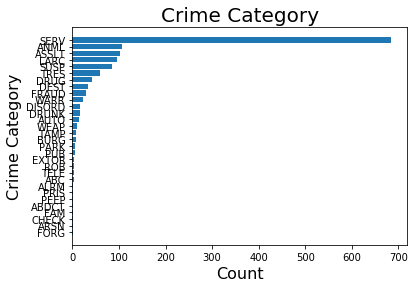

In [26]:
Freq = Freq.sort_values(by=['Count'], ascending=True)
pos = np.arange(len(Freq.index.values))
plt.barh(pos, Freq['Count'])
plt.yticks(pos, Freq.index.values)
plt.xlabel('Count', fontsize=16)
plt.ylabel('Crime Category', fontsize=16)
plt.title('Crime Category',fontsize=20)
plt.show()

(19, 1)


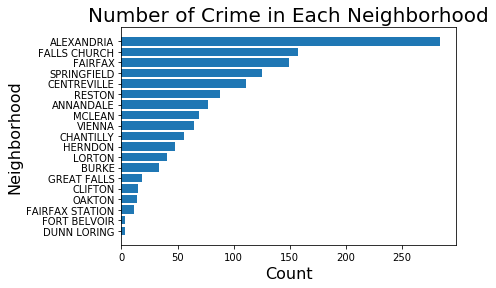

In [27]:
Freq4 = df.groupby(['Neighborhood']).size().to_frame(name='Count')
Freq4 = Freq4.sort_values(by=['Count'], ascending = True)
print(Freq4.shape)
pos = np.arange(len(Freq4.index.values))
plt.barh(pos, Freq4['Count'])
plt.yticks(pos, Freq4.index.values)
plt.xlabel('Count', fontsize=16)
plt.ylabel('Neighborhood', fontsize=16)
plt.title('Number of Crime in Each Neighborhood',fontsize=20)
plt.show()

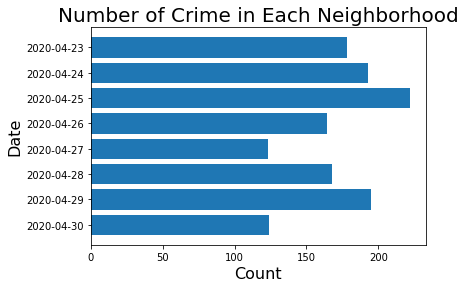

In [28]:
df['Date'] = df['Date'].astype(str)
Freq_Date = df.groupby(['Date']).size().to_frame(name='Count')
Freq_Date = Freq_Date.sort_values(by=['Date'], ascending = False)
pos = np.arange(len(Freq_Date.index.values))
plt.barh(pos, Freq_Date['Count'])
plt.yticks(pos, Freq_Date.index.values)
plt.xlabel('Count', fontsize=16)
plt.ylabel('Date', fontsize=16)
plt.title('Number of Crime in Each Neighborhood',fontsize=20)
plt.show()

In [29]:
address = 'Fairfax, VA'
geolocator = Nominatim(user_agent="ca_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Fairfax, VA are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Fairfax, VA are 38.8462236, -77.3063733.


In [30]:
geolocator = Nominatim(user_agent="ca_explorer")
Latitude = []
Longitude = []
for i in range(len(df['Neighborhood'])):
    add = df['Neighborhood'][i] + ', ' + 'VA'
    loc = geolocator.geocode(add)
    Latitude.append(loc.latitude)
    Longitude.append(loc.longitude)

df["Latitude"] = Latitude
df["Longitude"] = Longitude
df.head()

,Crime,Description,Date,Neighborhood,State,Zip_code,Crime_Category,Latitude,Longitude
0,FRAUD-26C-1,FRAUD - IMPERSONATION,2020-04-23,FAIRFAX,VA,22030,FRAUD,38.815636,-77.283685
1,LARC-23-11,LARCENY - CHECKS; CREDIT CARDS; BANK NOTES; ETC.,2020-04-23,ALEXANDRIA,VA,22315,LARC,38.805110,-77.047023
2,FRAUD-26C-1,FRAUD - IMPERSONATION,2020-04-23,ALEXANDRIA,VA,22315,FRAUD,38.805110,-77.047023
3,SERV-29,SERVICE - DOMESTIC DISPUTE,2020-04-23,ANNANDALE,VA,22003,SERV,38.830310,-77.196497
4,SERV-29,SERVICE - DOMESTIC DISPUTE,2020-04-23,CENTREVILLE,VA,20120,SERV,38.840391,-77.428877


In [31]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df.Latitude, df.Longitude, df.Crime_Category):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
map

In [32]:
Freq5 = df.groupby(['Zip_code']).size().to_frame(name='Count')
Freq5 = Freq5.sort_values(by=['Count'], ascending = True).reset_index()
Freq5['Zip_code'] = Freq5['Zip_code'].astype(int)
print(Freq5.shape)
Pop = pd.merge(Freq5, Population, how = 'left', on = 'Zip_code')

print(Pop.shape)
Pop = Pop.sort_values(by=['Population'], ascending = False).reset_index()
# Capitalize City to be consistent with the City variable in df
Pop['Neighborhood'] = Pop['Neighborhood'].str.upper()
Pop.head()

(44, 2)
(44, 4)


,index,Zip_code,Count,Neighborhood,Population
0,42,22003,77,ANNANDALE,45824
1,24,22030,31,FAIRFAX,40608
2,22,20171,29,HERNDON,40571
3,26,22015,33,BURKE,38291
4,40,20120,66,CENTREVILLE,35432


In [33]:
geolocator = Nominatim(user_agent="ca_explorer")
Latitude = []
Longitude = []
for i in range(len(Pop['Neighborhood'])):
    add = Pop['Neighborhood'][i] + ', ' + 'VA'
    loc = geolocator.geocode(add)
    Latitude.append(loc.latitude)
    Longitude.append(loc.longitude)

Pop["Latitude"] = Latitude
Pop["Longitude"] = Longitude
Pop.head()

,index,Zip_code,Count,Neighborhood,Population,Latitude,Longitude
0,42,22003,77,ANNANDALE,45824,38.830310,-77.196497
1,24,22030,31,FAIRFAX,40608,38.815636,-77.283685
2,22,20171,29,HERNDON,40571,38.969532,-77.385948
3,26,22015,33,BURKE,38291,38.777132,-77.275469
4,40,20120,66,CENTREVILLE,35432,38.840391,-77.428877


/opt/conda/envs/Python36/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


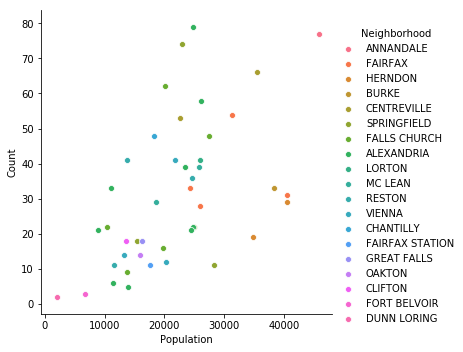

In [34]:
import seaborn as sns
sns.pairplot(x_vars=['Population'], y_vars=['Count'], data=Pop, hue="Neighborhood", size=5)

In [35]:
Pop[['Count', 'Population']].corr()

,Count,Population
Count,1.000000,0.528677
Population,0.528677,1.000000


The intercept is 6.358745986751504
The slope is [0.00113532]


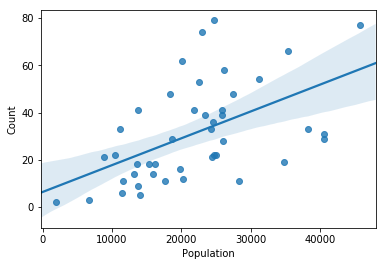

In [36]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
X = Pop[['Population']]
Y = Pop['Count']
lm.fit(X,Y)
print('The intercept is', lm.intercept_)
print('The slope is', lm.coef_)
#Yhat=lm.predict(X)
sns.regplot(x='Population', y='Count', data=Pop)

In [37]:
CLIENT_ID = 'your Foursquare ID' # 
CLIENT_SECRET = 'your Foursquare Secret'
VERSION = '20180605' # Foursquare API version

In [38]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
 # create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5eaef8f0e826ac001bd22d50'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Fairfax',
  'headerFullLocation': 'Fairfax',
  'headerLocationGranularity': 'city',
  'totalResults': 40,
  'suggestedBounds': {'ne': {'lat': 38.850723604500004,
    'lng': -77.30060620087593},
   'sw': {'lat': 38.8417235955, 'lng': -77.31214039912408}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '53fcce77498e1c681f8153d4',
       'name': 'De Clieu Coffee',
       'location': {'address': '10389 Main St # B',
        'crossStreet': 'university Dr',
        'lat': 38.845818,
        'lng': -77.305153,
        'labeledLatLngs': [{

In [39]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [40]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) # flatten JSON
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))
nearby_venues.head()

40 venues were returned by Foursquare.


,name,categories,lat,lng
0,De Clieu Coffee,Café,38.845818,-77.305153
1,Mobius Records,Record Shop,38.845888,-77.305232
2,The Wine House,Wine Bar,38.847225,-77.305611
3,Bollywood Bistro,Indian Restaurant,38.847198,-77.305692
4,Havabite Eatery Family Restaurant,Greek Restaurant,38.846174,-77.306065


In [41]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [42]:
df_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

FAIRFAX
ALEXANDRIA
ALEXANDRIA
ANNANDALE
CENTREVILLE
FALLS CHURCH
CENTREVILLE
VIENNA
LORTON
RESTON
ALEXANDRIA
ALEXANDRIA
CHANTILLY
CHANTILLY
CHANTILLY
SPRINGFIELD
RESTON
RESTON
RESTON
FAIRFAX
CENTREVILLE
CENTREVILLE
BURKE
ALEXANDRIA
ALEXANDRIA
ALEXANDRIA
FALLS CHURCH
FALLS CHURCH
FAIRFAX
RESTON
SPRINGFIELD
OAKTON
HERNDON
ALEXANDRIA
SPRINGFIELD
SPRINGFIELD
CENTREVILLE
MCLEAN
MCLEAN
ANNANDALE
BURKE
ALEXANDRIA
ALEXANDRIA
CENTREVILLE
CENTREVILLE
RESTON
RESTON
OAKTON
OAKTON
RESTON
FALLS CHURCH
CENTREVILLE
CENTREVILLE
LORTON
MCLEAN
MCLEAN
ALEXANDRIA
FALLS CHURCH
FALLS CHURCH
RESTON
RESTON
OAKTON
VIENNA
VIENNA
ALEXANDRIA
ALEXANDRIA
ALEXANDRIA
CHANTILLY
FALLS CHURCH
FALLS CHURCH
FAIRFAX
RESTON
SPRINGFIELD
ALEXANDRIA
ALEXANDRIA
CENTREVILLE
RESTON
RESTON
LORTON
RESTON
FALLS CHURCH
FALLS CHURCH
FALLS CHURCH
FALLS CHURCH
FALLS CHURCH
FALLS CHURCH
FAIRFAX
FAIRFAX
ALEXANDRIA
ALEXANDRIA
ALEXANDRIA
ALEXANDRIA
CENTREVILLE
RESTON
SPRINGFIELD
SPRINGFIELD
ALEXANDRIA
ALEXANDRIA
FALLS CHURCH
FALLS CHURCH
ALE

In [43]:
print(df_venues.shape)
df_venues.head()

(61196, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,FAIRFAX,38.815636,-77.283685,Winter Wonderland!,38.814888,-77.277996,Scenic Lookout
1,ALEXANDRIA,38.805110,-77.047023,Old Town Alexandria,38.804960,-77.047437,Neighborhood
2,ALEXANDRIA,38.805110,-77.047023,Nando's Peri-Peri,38.805002,-77.047422,Portuguese Restaurant
3,ALEXANDRIA,38.805110,-77.047023,Sugarhouse Day Spa & Salon,38.805927,-77.048893,Spa
4,ALEXANDRIA,38.805110,-77.047023,Ten Thousand Villages,38.805412,-77.049840,Gift Shop


In [44]:
df_venues['Venue Category'].value_counts()
print('There are {} uniques categories.'.format(len(df_venues['Venue Category'].unique())))

There are 162 uniques categories.


In [45]:
df_onehot = pd.get_dummies(df_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
df_onehot['Neighborhood'] = df_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [df_onehot.columns[-1]] + list(df_onehot.columns[:-1])
df_onehot = df_onehot[fixed_columns]

df_onehot.head()

,Yoga Studio,Accessories Store,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,...,Thrift / Vintage Store,Trail,Train Station,Turkish Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df_grouped = df_onehot.groupby('Neighborhood').mean().reset_index()
df_grouped

,Neighborhood,Yoga Studio,Accessories Store,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Thrift / Vintage Store,Trail,Train Station,Turkish Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,ALEXANDRIA,0.02,0.000000,0.060000,0.010000,0.000000,0.010000,0.010000,0.010000,0.000000,...,0.01,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.01000,0.000000,0.010000
1,ANNANDALE,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.019608,0.078431,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.019608,0.00000,0.000000,0.000000
2,BURKE,0.00,0.000000,0.037037,0.000000,0.000000,0.000000,0.000000,0.074074,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
3,CENTREVILLE,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.029412,0.00000,0.000000,0.000000
4,CHANTILLY,0.00,0.000000,0.054054,0.000000,0.000000,0.000000,0.000000,0.000000,0.027027,...,0.00,0.000000,0.000000,0.000000,0.000000,0.027027,0.054054,0.00000,0.000000,0.000000
5,CLIFTON,0.00,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.055556,0.000000
6,DUNN LORING,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
7,FAIRFAX,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
8,FAIRFAX STATION,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.00000,0.000000,0.000000
9,FALLS CHURCH,0.00,0.000000,0.020408,0.020408,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.020408,0.00000,0.000000,0.000000


In [47]:
num_top_venues = 5

for hood in df_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = df_grouped[df_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ALEXANDRIA----
                 venue  freq
0  American Restaurant  0.06
1                  Spa  0.04
2       Clothing Store  0.03
3          Coffee Shop  0.03
4             Boutique  0.03


----ANNANDALE----
               venue  freq
0  Korean Restaurant  0.33
1   Asian Restaurant  0.08
2           Pharmacy  0.06
3        Pizza Place  0.06
4      Grocery Store  0.04


----BURKE----
                venue  freq
0    Business Service  0.07
1         Coffee Shop  0.07
2    Asian Restaurant  0.07
3              Bakery  0.07
4  Italian Restaurant  0.04


----CENTREVILLE----
               venue  freq
0  Korean Restaurant  0.15
1                Spa  0.09
2             Bakery  0.09
3           Pharmacy  0.06
4        Pizza Place  0.06


----CHANTILLY----
                   venue  freq
0                  Hotel  0.08
1            Pizza Place  0.05
2    American Restaurant  0.05
3  Vietnamese Restaurant  0.05
4      Indian Restaurant  0.05


----CLIFTON----
                venue  freq
0  It

In [48]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [80]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = df_grouped['Neighborhood']

for ind in np.arange(df_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(df_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ALEXANDRIA,American Restaurant,Spa,Boutique,Clothing Store,Coffee Shop,French Restaurant,Italian Restaurant,Historic Site,Mexican Restaurant,Ice Cream Shop
1,ANNANDALE,Korean Restaurant,Asian Restaurant,Pharmacy,Pizza Place,Grocery Store,Bubble Tea Shop,Soup Place,Latin American Restaurant,Smoke Shop,Shopping Mall
2,BURKE,Business Service,Coffee Shop,Bakery,Asian Restaurant,Italian Restaurant,Flower Shop,Convenience Store,Pizza Place,Pharmacy,Fast Food Restaurant
3,CENTREVILLE,Korean Restaurant,Bakery,Spa,Pharmacy,Pizza Place,Salon / Barbershop,Latin American Restaurant,Breakfast Spot,Bubble Tea Shop,Convenience Store
4,CHANTILLY,Hotel,Supermarket,Vietnamese Restaurant,Pizza Place,American Restaurant,Indian Restaurant,Bank,Deli / Bodega,Donut Shop,Korean Restaurant


In [81]:
# set number of clusters
kclusters = 5

df_grouped_clustering = df_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 2, 1, 0, 0], dtype=int32)

In [82]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted
df_merged = df
df_merged = df_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
df_merged.head()

,Crime,Description,Date,Neighborhood,State,Zip_code,Crime_Category,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,FRAUD-26C-1,FRAUD - IMPERSONATION,2020-04-23,FAIRFAX,VA,22030,FRAUD,38.815636,-77.283685,1,Scenic Lookout,Women's Store,Event Service,French Restaurant,Food Truck,Food Service,Flower Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
1,LARC-23-11,LARCENY - CHECKS; CREDIT CARDS; BANK NOTES; ETC.,2020-04-23,ALEXANDRIA,VA,22315,LARC,38.805110,-77.047023,0,American Restaurant,Spa,Boutique,Clothing Store,Coffee Shop,French Restaurant,Italian Restaurant,Historic Site,Mexican Restaurant,Ice Cream Shop
2,FRAUD-26C-1,FRAUD - IMPERSONATION,2020-04-23,ALEXANDRIA,VA,22315,FRAUD,38.805110,-77.047023,0,American Restaurant,Spa,Boutique,Clothing Store,Coffee Shop,French Restaurant,Italian Restaurant,Historic Site,Mexican Restaurant,Ice Cream Shop
3,SERV-29,SERVICE - DOMESTIC DISPUTE,2020-04-23,ANNANDALE,VA,22003,SERV,38.830310,-77.196497,0,Korean Restaurant,Asian Restaurant,Pharmacy,Pizza Place,Grocery Store,Bubble Tea Shop,Soup Place,Latin American Restaurant,Smoke Shop,Shopping Mall
4,SERV-29,SERVICE - DOMESTIC DISPUTE,2020-04-23,CENTREVILLE,VA,20120,SERV,38.840391,-77.428877,0,Korean Restaurant,Bakery,Spa,Pharmacy,Pizza Place,Salon / Barbershop,Latin American Restaurant,Breakfast Spot,Bubble Tea Shop,Convenience Store


In [83]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_merged['Latitude'], df_merged['Longitude'], df_merged['Neighborhood'], df_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [92]:
df_merged.loc[df_merged['Cluster Labels'] == 0, df_merged.columns[[3] + list(range(5, df_merged.shape[1]))]]

,Neighborhood,Zip_code,Crime_Category,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,ALEXANDRIA,22315,LARC,38.805110,-77.047023,0,American Restaurant,Spa,Boutique,Clothing Store,Coffee Shop,French Restaurant,Italian Restaurant,Historic Site,Mexican Restaurant,Ice Cream Shop
2,ALEXANDRIA,22315,FRAUD,38.805110,-77.047023,0,American Restaurant,Spa,Boutique,Clothing Store,Coffee Shop,French Restaurant,Italian Restaurant,Historic Site,Mexican Restaurant,Ice Cream Shop
3,ANNANDALE,22003,SERV,38.830310,-77.196497,0,Korean Restaurant,Asian Restaurant,Pharmacy,Pizza Place,Grocery Store,Bubble Tea Shop,Soup Place,Latin American Restaurant,Smoke Shop,Shopping Mall
4,CENTREVILLE,20120,SERV,38.840391,-77.428877,0,Korean Restaurant,Bakery,Spa,Pharmacy,Pizza Place,Salon / Barbershop,Latin American Restaurant,Breakfast Spot,Bubble Tea Shop,Convenience Store
5,FALLS CHURCH,22041,SERV,38.882334,-77.171091,0,Grocery Store,Bar,Italian Restaurant,Sushi Restaurant,Coffee Shop,Chinese Restaurant,Gym / Fitness Center,Convenience Store,Shipping Store,Food Truck
6,CENTREVILLE,20120,SERV,38.840391,-77.428877,0,Korean Restaurant,Bakery,Spa,Pharmacy,Pizza Place,Salon / Barbershop,Latin American Restaurant,Breakfast Spot,Bubble Tea Shop,Convenience Store
7,VIENNA,22180,SERV,38.901373,-77.265176,0,Pizza Place,Bakery,Pharmacy,Discount Store,Sandwich Place,Coffee Shop,Pet Store,Dessert Shop,Baseball Field,Bank
8,LORTON,22079,WARR,38.704340,-77.220343,0,Sandwich Place,Mexican Restaurant,American Restaurant,Video Store,Japanese Restaurant,Train Station,Ice Cream Shop,Shipping Store,Donut Shop,Chinese Restaurant
9,RESTON,20190,DRUNK,38.958374,-77.357980,0,American Restaurant,Plaza,New American Restaurant,Ice Cream Shop,Women's Store,Hotel,Salad Place,Restaurant,Poke Place,Pizza Place
10,ALEXANDRIA,22306,LARC,38.805110,-77.047023,0,American Restaurant,Spa,Boutique,Clothing Store,Coffee Shop,French Restaurant,Italian Restaurant,Historic Site,Mexican Restaurant,Ice Cream Shop


In [93]:
df_merged.loc[df_merged['Cluster Labels'] == 1, df_merged.columns[[3] + list(range(5, df_merged.shape[1]))]]

,Neighborhood,Zip_code,Crime_Category,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,FAIRFAX,22030,FRAUD,38.815636,-77.283685,1,Scenic Lookout,Women's Store,Event Service,French Restaurant,Food Truck,Food Service,Flower Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
19,FAIRFAX,22032,FRAUD,38.815636,-77.283685,1,Scenic Lookout,Women's Store,Event Service,French Restaurant,Food Truck,Food Service,Flower Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
28,FAIRFAX,22033,SUSP,38.815636,-77.283685,1,Scenic Lookout,Women's Store,Event Service,French Restaurant,Food Truck,Food Service,Flower Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
70,FAIRFAX,22033,SERV,38.815636,-77.283685,1,Scenic Lookout,Women's Store,Event Service,French Restaurant,Food Truck,Food Service,Flower Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
86,FAIRFAX,22033,SERV,38.815636,-77.283685,1,Scenic Lookout,Women's Store,Event Service,French Restaurant,Food Truck,Food Service,Flower Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
87,FAIRFAX,22033,SERV,38.815636,-77.283685,1,Scenic Lookout,Women's Store,Event Service,French Restaurant,Food Truck,Food Service,Flower Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
123,FAIRFAX,22031,ASSLT,38.815636,-77.283685,1,Scenic Lookout,Women's Store,Event Service,French Restaurant,Food Truck,Food Service,Flower Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
143,FAIRFAX,22033,BURG,38.815636,-77.283685,1,Scenic Lookout,Women's Store,Event Service,French Restaurant,Food Truck,Food Service,Flower Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
144,FAIRFAX,22033,ASSLT,38.815636,-77.283685,1,Scenic Lookout,Women's Store,Event Service,French Restaurant,Food Truck,Food Service,Flower Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
145,FAIRFAX,22033,DEST,38.815636,-77.283685,1,Scenic Lookout,Women's Store,Event Service,French Restaurant,Food Truck,Food Service,Flower Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market


In [94]:
df_merged.loc[df_merged['Cluster Labels'] == 2, df_merged.columns[[3] + list(range(5, df_merged.shape[1]))]]

,Neighborhood,Zip_code,Crime_Category,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
149,DUNN LORING,22182,SERV,38.893445,-77.221648,2,Event Service,Auto Garage,Trail,Fried Chicken Joint,French Restaurant,Food Truck,Food Service,Flower Shop,Fish & Chips Shop,Fast Food Restaurant
973,DUNN LORING,22027,SERV,38.893445,-77.221648,2,Event Service,Auto Garage,Trail,Fried Chicken Joint,French Restaurant,Food Truck,Food Service,Flower Shop,Fish & Chips Shop,Fast Food Restaurant
974,DUNN LORING,22027,SERV,38.893445,-77.221648,2,Event Service,Auto Garage,Trail,Fried Chicken Joint,French Restaurant,Food Truck,Food Service,Flower Shop,Fish & Chips Shop,Fast Food Restaurant


In [95]:
df_merged.loc[df_merged['Cluster Labels'] == 3, df_merged.columns[[3] + list(range(5, df_merged.shape[1]))]]

,Neighborhood,Zip_code,Crime_Category,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,SPRINGFIELD,22150,SERV,38.789052,-77.187037,3,Lawyer,Donut Shop,Locksmith,Farmers Market,Fried Chicken Joint,French Restaurant,Food Truck,Food Service,Flower Shop,Fish & Chips Shop
30,SPRINGFIELD,22153,ANML,38.789052,-77.187037,3,Lawyer,Donut Shop,Locksmith,Farmers Market,Fried Chicken Joint,French Restaurant,Food Truck,Food Service,Flower Shop,Fish & Chips Shop
34,SPRINGFIELD,22150,DEST,38.789052,-77.187037,3,Lawyer,Donut Shop,Locksmith,Farmers Market,Fried Chicken Joint,French Restaurant,Food Truck,Food Service,Flower Shop,Fish & Chips Shop
35,SPRINGFIELD,22150,SERV,38.789052,-77.187037,3,Lawyer,Donut Shop,Locksmith,Farmers Market,Fried Chicken Joint,French Restaurant,Food Truck,Food Service,Flower Shop,Fish & Chips Shop
72,SPRINGFIELD,22150,TRES,38.789052,-77.187037,3,Lawyer,Donut Shop,Locksmith,Farmers Market,Fried Chicken Joint,French Restaurant,Food Truck,Food Service,Flower Shop,Fish & Chips Shop
94,SPRINGFIELD,22150,ASSLT,38.789052,-77.187037,3,Lawyer,Donut Shop,Locksmith,Farmers Market,Fried Chicken Joint,French Restaurant,Food Truck,Food Service,Flower Shop,Fish & Chips Shop
95,SPRINGFIELD,22153,ASSLT,38.789052,-77.187037,3,Lawyer,Donut Shop,Locksmith,Farmers Market,Fried Chicken Joint,French Restaurant,Food Truck,Food Service,Flower Shop,Fish & Chips Shop
124,SPRINGFIELD,22150,SUSP,38.789052,-77.187037,3,Lawyer,Donut Shop,Locksmith,Farmers Market,Fried Chicken Joint,French Restaurant,Food Truck,Food Service,Flower Shop,Fish & Chips Shop
125,SPRINGFIELD,22150,ALRM,38.789052,-77.187037,3,Lawyer,Donut Shop,Locksmith,Farmers Market,Fried Chicken Joint,French Restaurant,Food Truck,Food Service,Flower Shop,Fish & Chips Shop
126,SPRINGFIELD,22150,WARR,38.789052,-77.187037,3,Lawyer,Donut Shop,Locksmith,Farmers Market,Fried Chicken Joint,French Restaurant,Food Truck,Food Service,Flower Shop,Fish & Chips Shop


In [96]:
df_merged.loc[df_merged['Cluster Labels'] == 4, df_merged.columns[[3] + list(range(5, df_merged.shape[1]))]]

,Neighborhood,Zip_code,Crime_Category,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
31,OAKTON,22124,SERV,38.896729,-77.298664,4,Art Gallery,Community Center,Asian Restaurant,Park,Harbor / Marina,Women's Store,Farmers Market,French Restaurant,Food Truck,Food Service
47,OAKTON,22124,ANML,38.896729,-77.298664,4,Art Gallery,Community Center,Asian Restaurant,Park,Harbor / Marina,Women's Store,Farmers Market,French Restaurant,Food Truck,Food Service
48,OAKTON,22124,ANML,38.896729,-77.298664,4,Art Gallery,Community Center,Asian Restaurant,Park,Harbor / Marina,Women's Store,Farmers Market,French Restaurant,Food Truck,Food Service
61,OAKTON,22124,SERV,38.896729,-77.298664,4,Art Gallery,Community Center,Asian Restaurant,Park,Harbor / Marina,Women's Store,Farmers Market,French Restaurant,Food Truck,Food Service
319,OAKTON,22124,ASSLT,38.896729,-77.298664,4,Art Gallery,Community Center,Asian Restaurant,Park,Harbor / Marina,Women's Store,Farmers Market,French Restaurant,Food Truck,Food Service
531,OAKTON,22124,SUSP,38.896729,-77.298664,4,Art Gallery,Community Center,Asian Restaurant,Park,Harbor / Marina,Women's Store,Farmers Market,French Restaurant,Food Truck,Food Service
532,OAKTON,22124,SERV,38.896729,-77.298664,4,Art Gallery,Community Center,Asian Restaurant,Park,Harbor / Marina,Women's Store,Farmers Market,French Restaurant,Food Truck,Food Service
622,OAKTON,22124,SUSP,38.896729,-77.298664,4,Art Gallery,Community Center,Asian Restaurant,Park,Harbor / Marina,Women's Store,Farmers Market,French Restaurant,Food Truck,Food Service
623,OAKTON,22124,SERV,38.896729,-77.298664,4,Art Gallery,Community Center,Asian Restaurant,Park,Harbor / Marina,Women's Store,Farmers Market,French Restaurant,Food Truck,Food Service
1078,OAKTON,22124,SERV,38.896729,-77.298664,4,Art Gallery,Community Center,Asian Restaurant,Park,Harbor / Marina,Women's Store,Farmers Market,French Restaurant,Food Truck,Food Service
